# Cryptocurrency Analysis with Python - Log Returns

In [previous post]({{site.url}}/cryptocurrency/analysis/2017/12/25/cryptocurrency-analysis-with-python-part2.html), we analyzed raw price changes of cryptocurrencies. The problem with that approach is that prices of different cryptocurrencies are not normalized and we cannot use comparable metrics. 

In this post, we describe benefits of using log returns for analysis of price changes. You can download this [Jupyter Notebook]({{site.url}}/assets/notebooks/2017-12-29-cryptocurrency-analysis-with-python-part3.ipynb) and the [data]({{site.url}}/assets/data/). 

Follow me on [twitter](https://twitter.com/romanorac) to get latest updates.

![]({{site.url}}/assets/images/2017-12-29-cryptocurrency-analysis-with-python-part3/log_returns.png "Bitcoin, Ethereum, and Litecoin Log returns")

## Disclaimer
<span style="color:red">
**I am not a trader and this blog post is not a financial advice. This is purely introductory knowledge.
The conclusion here can be misleading as 
I analyze the time period with immense growth. **
</span>

## Requirements

- [SciPy - scientific and numerical tools for Python](https://www.scipy.org/)

For other requirements, see my
[first blog post]({{site.url}}/cryptocurrency/analysis/2017/12/17/cryptocurrency-analysis-with-python-part1.html)
of this series.

## Load the data

In [1]:
import pandas as pd

df_btc = pd.read_csv('BTC_USD_Coinbase_hour_2017-12-24.csv', index_col='datetime')
df_eth = pd.read_csv('ETH_USD_Coinbase_hour_2017-12-24.csv', index_col='datetime')
df_ltc = pd.read_csv('LTC_USD_Coinbase_hour_2017-12-24.csv', index_col='datetime')

In [2]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})
df.index = df.index.map(pd.to_datetime)
df = df.sort_index()

In [3]:
df.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,4448.85,301.37,54.72
2017-10-02 09:00:00,4464.49,301.84,54.79
2017-10-02 10:00:00,4461.63,301.95,54.63
2017-10-02 11:00:00,4399.51,300.02,54.01
2017-10-02 12:00:00,4383.00,297.51,53.71


In [4]:
df.describe()

,BTC,ETH,LTC
count,2001.000000,2001.000000,2001.000000
mean,9060.256122,407.263793,106.790100
std,4404.269591,149.480416,89.142241
min,4150.020000,277.810000,48.610000
25%,5751.020000,301.510000,55.580000
50%,7319.950000,330.800000,63.550000
75%,11305.000000,464.390000,100.050000
max,19847.110000,858.900000,378.660000


## Why Log Returns?

Benefit of using returns, versus prices, is normalization: measuring all variables in a comparable metric, thus enabling evaluation of analytic relationships amongst two or more variables despite originating from price series of unequal values (for details, see [Why Log Returns](https://quantivity.wordpress.com/2011/02/21/why-log-returns/)).


Let's define return as:

$$
r_{i} = \frac{p_i - p_j}{p_j},
$$
where $r_i$ is return at time $i$, $p_i$ is the price at time $i$ and $j = i-1$.


### Calculate Log Returns

Author of [Why Log Returns](https://quantivity.wordpress.com/2011/02/21/why-log-returns/)
outlines several benefits of using log returns instead of returns so we transform **returns** equation to **log returns** equation:

$$
r_{i} = \frac{p_i - p_j}{p_j}
$$

$$
r_i = \frac{p_i}{p_j} - \frac{p_j}{p_j}
$$

$$
1 + r_i = \frac{p_i}{p_j}
$$


$$
log(1+r_i) = log(\frac{p_i}{p_j})
$$

$$
log(1+r_i) = log(p_i) - log(p_j)
$$

Now, we apply the log returns equation to closing prices of cryptocurrencies:

In [5]:
import numpy as np

# shift moves dates back by 1
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) 

In [6]:
df_change.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,NaN,NaN,NaN
2017-10-02 09:00:00,0.003509,0.001558,0.001278
2017-10-02 10:00:00,-0.000641,0.000364,-0.002925
2017-10-02 11:00:00,-0.014021,-0.006412,-0.011414
2017-10-02 12:00:00,-0.003760,-0.008401,-0.005570


### Visualize Log Returns

We plot normalized changes of closing prices for last 50 hours. Log differences can be interpreted as the percentage change.

In [7]:
df_change[:50].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

### Are LTC log returns normally distributed?

On the chart below, we plot the distribution of LTC log returns.
We also estimate parameters for normal distribution and plot estimated normal distribution with a red line.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


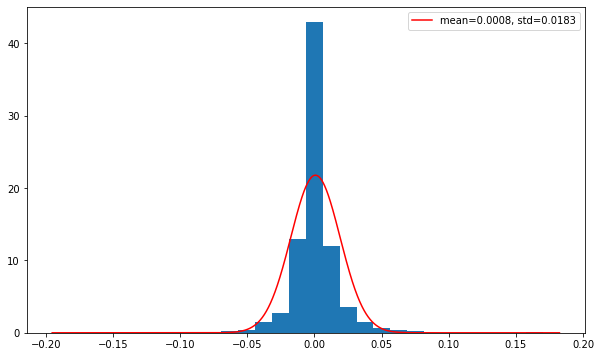

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

values = df_change['LTC'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

### Pearson Correlation with log returns

We calculate Pearson Correlation from log returns.
The correlation matrix below has similar values as the one at [Sifr Data](https://www.sifrdata.com/cryptocurrency-correlation-matrix/). 
There are differences because:
 - we don't calculate [volume-weighted average daily prices](https://www.investopedia.com/terms/v/vwap.asp)
 - different time period (hourly and daily),
 - different data source (Coinbase and Poloniex).
 
**Observations**
- BTC and ETH have moderate positive relationship,
- LTC and ETH have strong positive relationship.

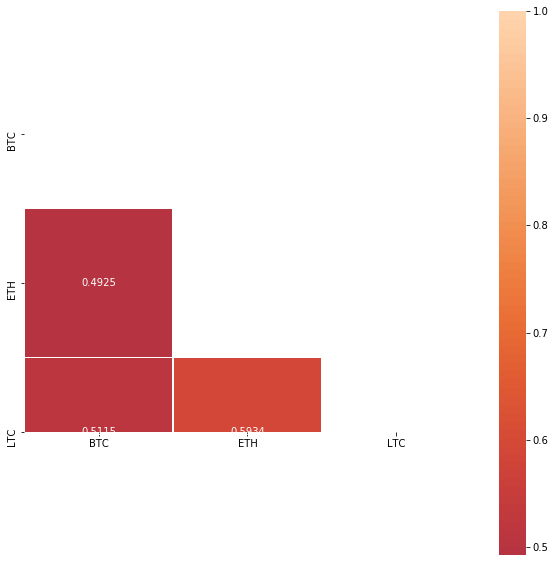

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

## Conclusion

We showed how to calculate log returns from raw prices with a practical example. 
This way we normalized prices, which simplifies further analysis. 
We also showed how to estimate parameters for normal and log-normal distributions.